# Diamonds_Price_EDA_and_Regression
1. Первичное статистическое исследование количественных и категориальных признаков

2. Анализ пропусков и дубликатов в данных, при необходимости — заполнение и удаление

3. Визуализация распределения признаков

4. Проверка на наличие выбросов и аномалий, при необходимости — обработка или удаление

5. Анализ категориальных признаков и выбор способа кодирования

6. Визуализация зависимостей между признаками

7. Построение тепловой карты корреляций

8. Отделение целевого признака (цены) и разбиение данных на обучающую и тестовую выборки

9. Нормализация признаков

10. Обучение модели линейной регрессии и оценка качества с использованием метрик R² и MSE

11. Обучение модели полиномиальной регрессии и сравнение результатов

12. Дополнительные регрессионные модели (Ridge и DecisionTreeRegressor)

## Импорт библиотек


In [174]:
import warnings
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

from google.colab import drive

In [175]:
warnings.filterwarnings("ignore")

## Загрузка датасета

In [176]:
df_origin = pd.read_csv('/content/diamonds.csv')

Набор данных содержит цены и другие атрибуты почти 54 000 бриллиантов.

Столбцы:

carat - Вес бриллианта в каратах (0,2-5,01)

cut - Качество огранки (Чистое, хорошее, очень хорошее, Премиум, Идеальное)

color - Цвет бриллианта от J (худший) до D (лучший)

clarity - Прозрачность - показатель чистоты алмаза (I1 (наихудший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучший))

depth  - Общая глубина в процентах = z / mean(x, y) = 2 * z / (x + y) (43--79)

table  - Ширина вершины ромба относительно самой широкой точки (43--95)

price  - Стоимость, указана в долларах США (от 326 до 18 823 долларов США).

x - Длина в мм (0--10,74)

y - Ширина в мм (0--58,9)

z - Глубина в мм (0--31,8)

In [177]:
df_origin.drop(columns=['Unnamed: 0'], inplace=True)

In [178]:
df_origin.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [179]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## 1. Первичное статистическое исследование количественных и категориальных признаков

### Вес бриллианта в каратах

In [180]:
carat = df_origin['carat']
print(f"Минимальный вес: {carat.min():.2f} ct")
print(f"Максимальный вес: {carat.max():.2f} ct")
print(f"Средний вес: {carat.mean():.2f} ct")
print(f"Медианный вес: {carat.median():.2f} ct")

Минимальный вес: 0.20 ct
Максимальный вес: 5.01 ct
Средний вес: 0.80 ct
Медианный вес: 0.70 ct


### Качество огранки

In [181]:
cut = df_origin['cut']
cut.value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


### Цвет бриллианта

In [182]:
color = df_origin['color']
color.value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


### Прозрачность

In [183]:
clarity = df_origin['clarity']
clarity.value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


### Общая глубина в процентах

In [184]:
depth = df_origin['depth']
print(f"Минимальная глубина: {depth.min():.2f}%")
print(f"Максимальная глубина: {depth.max():.2f}%")
print(f"Средняя глубина: {depth.mean():.2f}%")
print(f"Медианная глубина: {depth.median():.2f}%")

Минимальная глубина: 43.00%
Максимальная глубина: 79.00%
Средняя глубина: 61.75%
Медианная глубина: 61.80%


### Ширина вершины ромба относительно самой широкой точки

In [185]:
table = df_origin['table']
print(f"Минимальная ширина вершины: {table.min():.2f}%")
print(f"Максимальная ширина вершины: {table.max():.2f}%")
print(f"Средняя ширина вершины: {table.mean():.2f}%")
print(f"Медианная ширина вершины: {table.median():.2f}%")

Минимальная ширина вершины: 43.00%
Максимальная ширина вершины: 95.00%
Средняя ширина вершины: 57.46%
Медианная ширина вершины: 57.00%


### Стоимость

In [186]:
price = df_origin['price']
print(f"Минимальная цена: {price.min():,.2f}")
print(f"Максимальная цена: {price.max():,.2f}")
print(f"Средняя цена: {price.mean():,.2f}")
print(f"Медианная цена: {price.median():,.2f}")

Минимальная цена: 326.00
Максимальная цена: 18,823.00
Средняя цена: 3,932.80
Медианная цена: 2,401.00


### Длина в мм

In [187]:
x_len = df_origin['x']
print(f"Минимальная длина: {x_len.min():.2f} мм")
print(f"Максимальная длина: {x_len.max():.2f} мм")
print(f"Средняя длина: {x_len.mean():.2f} мм")
print(f"Медианная длина: {x_len.median():.2f} мм")

Минимальная длина: 0.00 мм
Максимальная длина: 10.74 мм
Средняя длина: 5.73 мм
Медианная длина: 5.70 мм


### Ширина в мм

In [188]:
y_width = df_origin['y']
print(f"Минимальная ширина: {y_width.min():.2f} мм")
print(f"Максимальная ширина: {y_width.max():.2f} мм")
print(f"Средняя ширина: {y_width.mean():.2f} мм")
print(f"Медианная ширина: {y_width.median():.2f} мм")

Минимальная ширина: 0.00 мм
Максимальная ширина: 58.90 мм
Средняя ширина: 5.73 мм
Медианная ширина: 5.71 мм


### Глубина в мм

In [189]:
z_depth = df_origin['z']
print(f"Минимальная глубина: {z_depth.min():.2f} мм")
print(f"Максимальная глубина: {z_depth.max():.2f} мм")
print(f"Средняя глубина: {z_depth.mean():.2f} мм")
print(f"Медианная глубина: {z_depth.median():.2f} мм")

Минимальная глубина: 0.00 мм
Максимальная глубина: 31.80 мм
Средняя глубина: 3.54 мм
Медианная глубина: 3.53 мм


## 2. Анализ пропусков и дубликатов в данных — заполнение и удаление

### Определение пропусков

In [190]:
df_origin.replace(0, np.nan, inplace=True) # Заменяем нули на nan

In [191]:
df_origin.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,8
y,7
z,20


#### Создаём маску, где пропущена z, но не пропущены x, y

In [192]:
mask_z = df_origin['z'].isna() & ~df_origin['y'].isna() & ~df_origin['x'].isna()

In [193]:
df_origin[mask_z].head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,NaN
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,NaN
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,NaN


#### Производим замену по формуле

In [194]:
df_origin.loc[mask_z, 'z'] = ((df_origin.loc[mask_z, ['x', 'y']].mean(axis=1) * df_origin.loc[mask_z, 'depth']) / 100).round(2)

depth(Общая глубина в процентах) = z / mean(x, y) ->

z = mean(x,y) * depth / 100

In [195]:
df_origin[mask_z].head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,3.85
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,3.85
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,4.09


In [196]:
df_origin.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,8
y,7
z,8


#### Удаляем где пропущены остальные значения

In [197]:
df_origin[df_origin['z'].isna()]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,NaN,6.62,NaN
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,NaN,NaN,NaN
15951,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,NaN,NaN,NaN
27429,2.25,Premium,H,SI2,62.8,59.0,18034,NaN,NaN,NaN
49556,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN
49557,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN


In [198]:
df_origin = df_origin.dropna(subset=['z']).reset_index(drop=True)

In [199]:
df_origin.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


### Определение дубликатов

In [200]:
df_origin.shape

(53932, 10)

In [201]:
df_origin.drop_duplicates()
df_origin.shape

(53932, 10)

Дубликатов нет

## 3. Визуализация распределений признаков


### Вес бриллианта

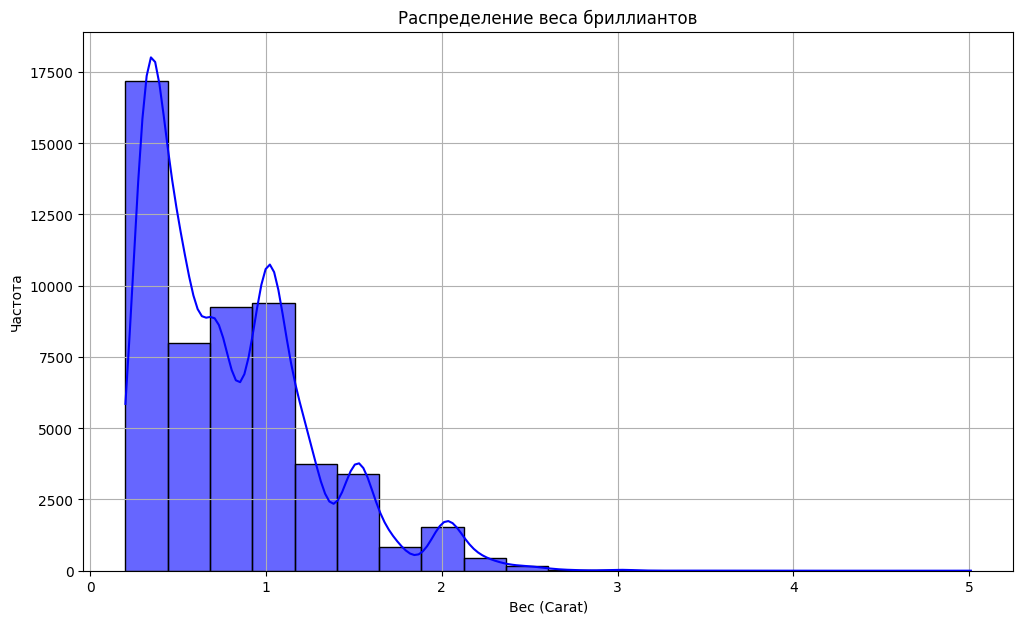

In [202]:
# Построение гистограммы веса (carat)
plt.figure(figsize=(12, 7))
sns.histplot(df_origin['carat'], bins=20, kde=True, color="blue", alpha=0.6, kde_kws={'bw_adjust': 1.5})
plt.xlabel('Вес (Carat)')
plt.ylabel('Частота')
plt.title('Распределение веса бриллиантов')
plt.grid(True)
plt.show()

График показывает распределение веса бриллиантов. Видно, что большинство камней имеют небольшой вес (до 1 карата), а частота встречаемости уменьшается с увеличением веса. Распределение имеет выраженный правый хвост, что говорит о редкости крупных бриллиантов.

### Качество огранки

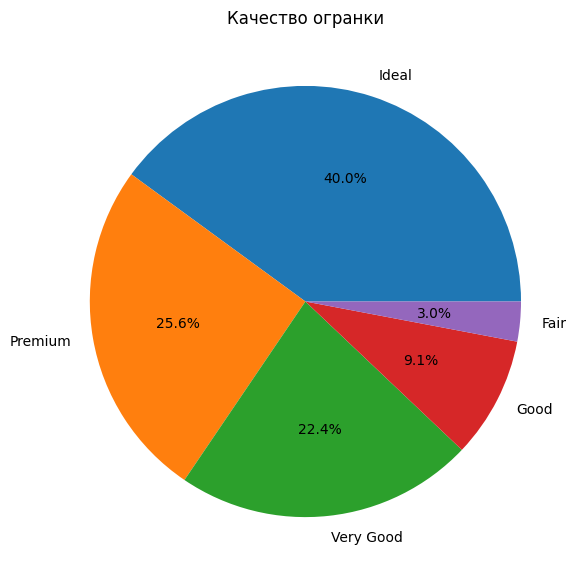

In [203]:
plt.figure(figsize=(12, 7))
plt.pie(df_origin['cut'].value_counts(), labels = df_origin['cut'].value_counts().index, autopct="%1.1f%%")
plt.title("Качество огранки")
plt.show()

Большая часть бриллиантов имеет огранку категории Ideal (40%), что говорит о высоком качестве обработки камней. Следующими по распространенности идут Premium (25.6%) и Very Good (22.4%). Категории Good (9.1%) и Fair (3.0%) встречаются значительно реже, что указывает на то, что бриллианты с менее качественной огранкой составляют небольшую долю.

### Прозрачность

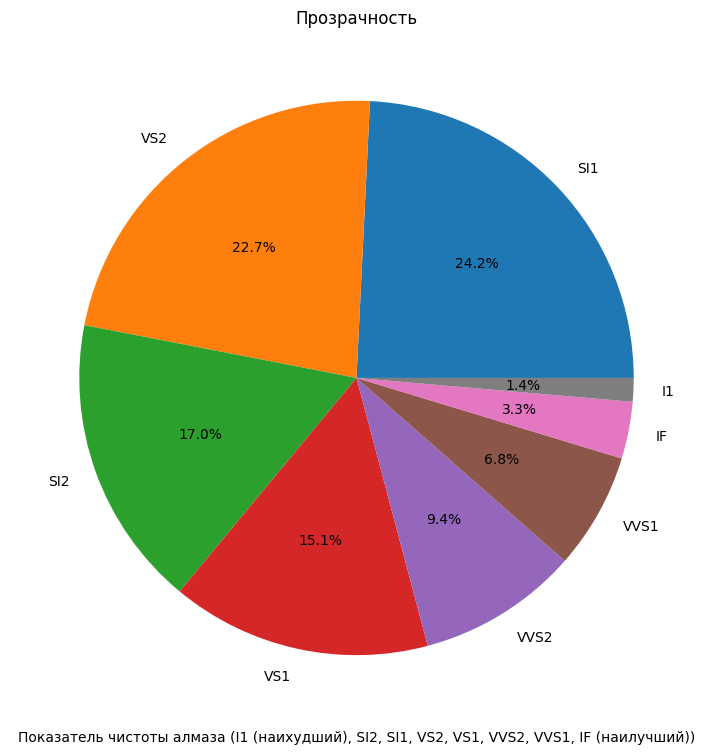

In [204]:
plt.figure(figsize=(12, 9))
plt.pie(df_origin['clarity'].value_counts(), labels = df_origin['clarity'].value_counts().index, autopct="%1.1f%%")
plt.title("Прозрачность")
plt.xlabel("Показатель чистоты алмаза (I1 (наихудший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучший))")
plt.show()

Наиболее распространенные категории прозрачности — SI1 (24.2%) и VS2 (22.7%). Достаточно часто встречаются SI2 (17.0%) и VS1 (15.1%). Бриллианты с высокой прозрачностью (VVS2, VVS1 и IF) составляют меньшую долю, а категория I1, относящаяся к наименее прозрачным камням, занимает всего 1.4%.

### Цвет

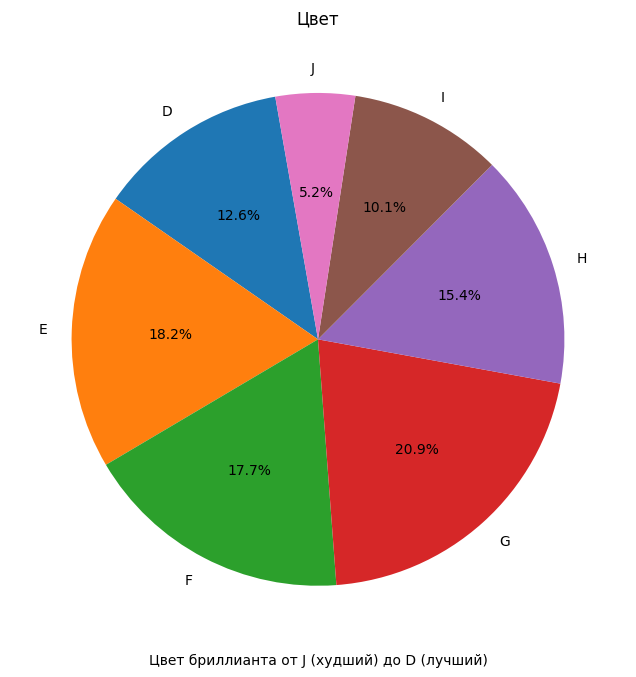

In [205]:
plt.figure(figsize=(12, 8))
color_counts = df_origin['color'].value_counts().sort_index()
plt.pie(color_counts, labels=color_counts.index, autopct="%1.1f%%", startangle=100)
plt.title("Цвет")
plt.xlabel("Цвет бриллианта от J (худший) до D (лучший)")
plt.show()

Самые распространенные цвета — G (20.9%), E (18.2%) и F (17.7%), что означает, что большинство бриллиантов имеют высокое качество цвета с минимальными оттенками желтизны. Реже встречаются камни с цветами H (15.4%), I (10.1%) и J (5.2%), которые имеют более выраженный желтоватый оттенок.

### Общая глубина в процентах

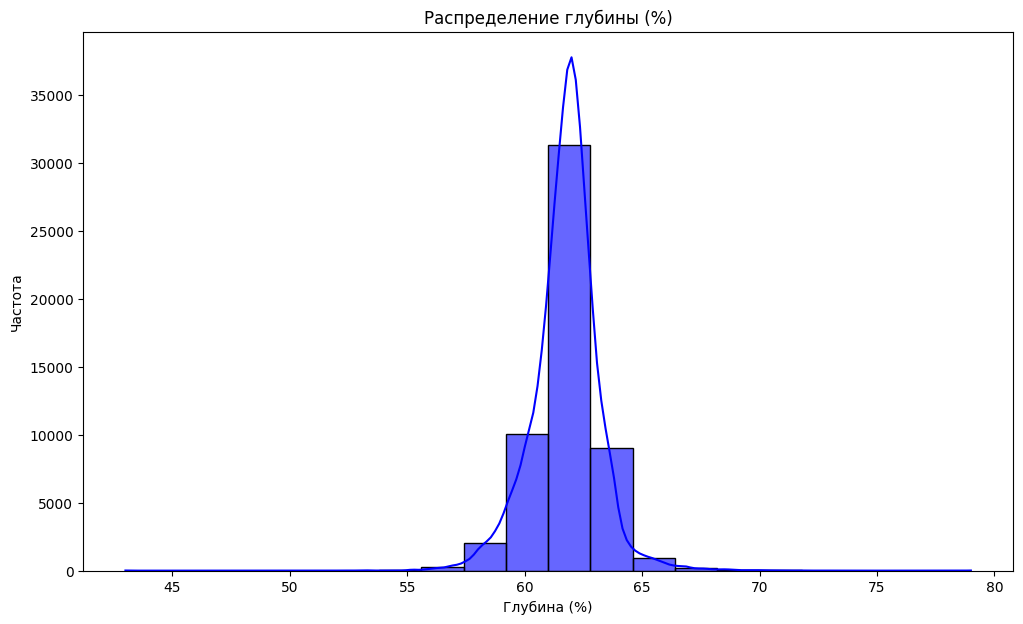

In [206]:
plt.figure(figsize=(12, 7))
sns.histplot(df_origin['depth'], bins=20, kde=True, color='blue', alpha=0.6)
plt.title("Распределение глубины (%)")
plt.xlabel("Глубина (%)")
plt.ylabel("Частота")
plt.show()

Глубина в большинстве случаев находится в пределах 59–61%, распределение близко к нормальному, а редкие выбросы за пределами 65% встречаются редко.

### Ширина вершины ромба относительно самой широкой точки

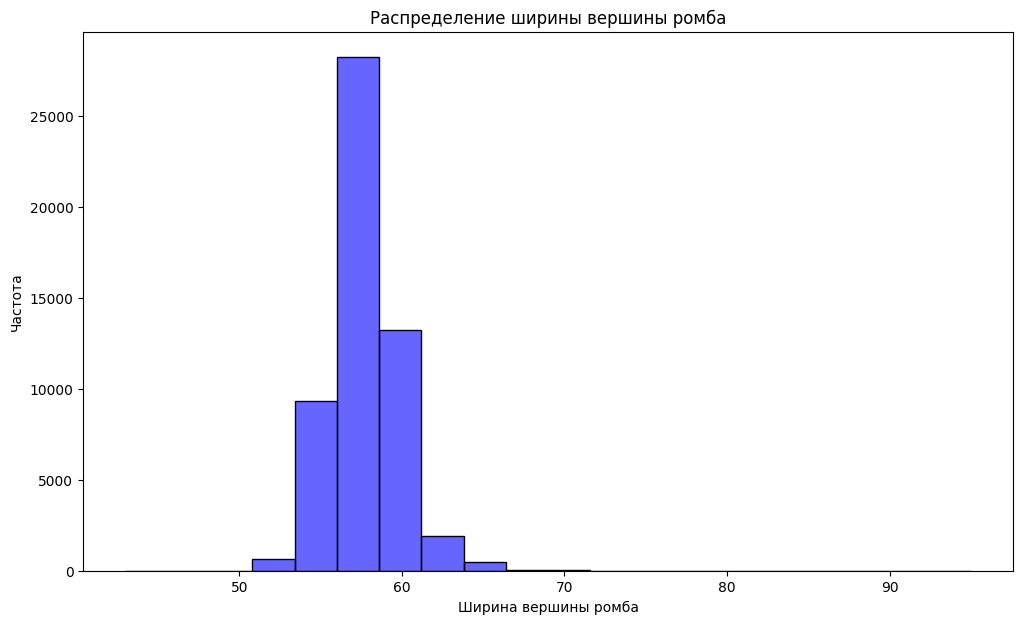

In [207]:
plt.figure(figsize=(12, 7))
sns.histplot(df_origin['table'], bins=20, color='blue', alpha=0.6)
plt.title("Распределение ширины вершины ромба")
plt.xlabel("Ширина вершины ромба")
plt.ylabel("Частота")
plt.show()

Ширина вершины ромба сосредоточена в диапазоне 57–58, распределение слабо асимметрично, но больших отклонений почти нет.

### Стоимость

#### Гистограмма

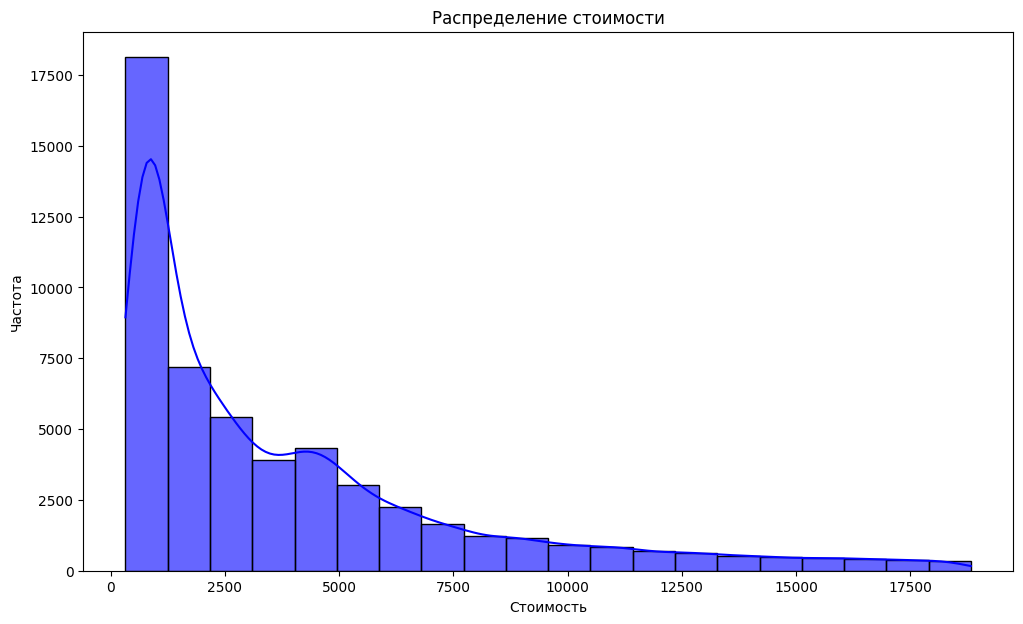

In [208]:
plt.figure(figsize=(12, 7))
sns.histplot(df_origin['price'], bins=20, kde=True, color='blue', alpha=0.6)
plt.title("Распределение стоимости")
plt.xlabel("Стоимость")
plt.ylabel("Частота")
plt.show()

Распределение стоимости имеет выраженный пик в нижнем диапазоне, большая часть бриллиантов стоит относительно недорого. Длинный хвост вправо указывает на наличие редких, но значительно более дорогих экземпляров, что свидетельствует о сильной неравномерности в ценах.

#### Цена в зависимости от цвета

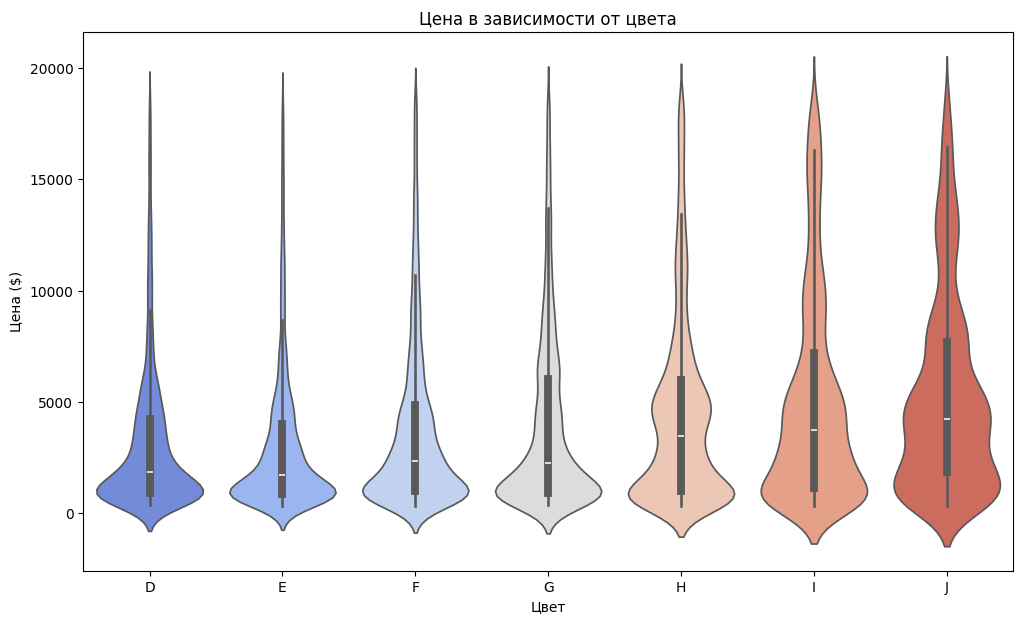

In [209]:
plt.figure(figsize=(12, 7))
color_order = sorted(df_origin['color'].unique())  # Указываем порядок цветов
sns.violinplot(x=df_origin['color'], y=df_origin['price'], palette="coolwarm", order=color_order)
plt.title("Цена в зависимости от цвета")
plt.xlabel("Цвет")
plt.ylabel("Цена ($)")
plt.show()

Наибольшие медианные цены наблюдаются у бриллиантов с цветом D, E и F, что подтверждает их высокое качество и меньший оттенок желтизны. По мере движения к цветам H, I и J цены снижаются, но наблюдаются выбросы с высокой стоимостью, что говорит о влиянии других факторов, таких как огранка и прозрачность.

#### Цена в зависимости от качества огранки

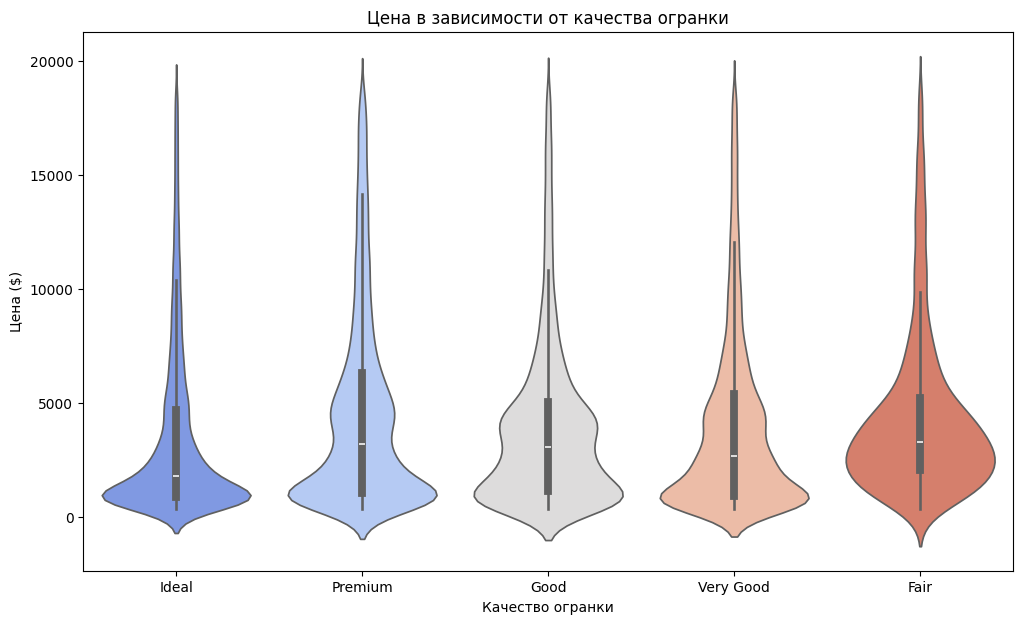

In [210]:
plt.figure(figsize=(12, 7))
sns.violinplot(x=df_origin['cut'], y=df_origin['price'], palette="coolwarm")
plt.title("Цена в зависимости от качества огранки")
plt.xlabel("Качество огранки")
plt.ylabel("Цена ($)")
plt.show()

Бриллианты с огранкой Ideal и Premium имеют схожий диапазон цен, но Premium демонстрирует чуть более высокие значения. Камни с огранкой Good и Fair в среднем дешевле, хотя наблюдаются отдельные дорогие экземпляры, что может объясняться их крупным размером или высокой прозрачностью.

#### Средняя цена по качеству огранки

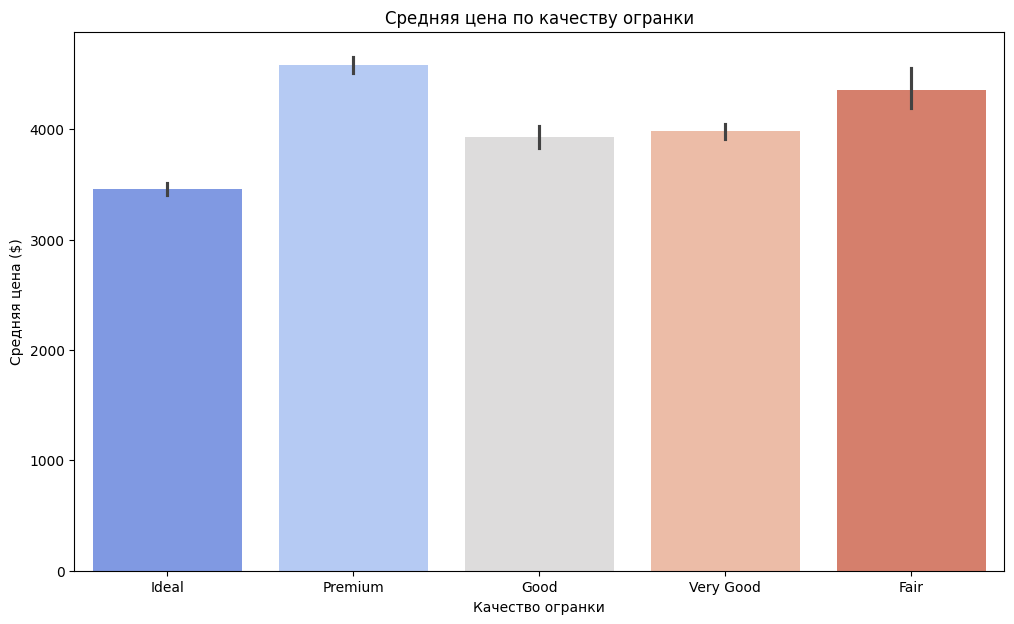

In [211]:
plt.figure(figsize=(12, 7))
sns.barplot(x=df_origin['cut'], y=df_origin['price'], estimator=lambda x: x.mean(), palette="coolwarm")
plt.title("Средняя цена по качеству огранки")
plt.xlabel("Качество огранки")
plt.ylabel("Средняя цена ($)")
plt.show()

Наибольшая средняя стоимость у бриллиантов с огранкой Premium, что указывает на их высокую ценность. Несмотря на то, что Ideal считается лучшей по качеству, её средняя цена ниже, скорее всего из-за небольши размеров. Огранка Fair, хоть и относится к менее качественным, имеет одну из самых высоких средних цен, что может быть связано с размером камней в этой категории.

## 4. Проверка на наличие выбросов и аномалий, при необходимости — обработка или удаление



### Функция для расчета границ выбросов




In [212]:
def get_outliers(df, column, coef=1.5):
    Q1 = df[column].quantile(0.25)  # Первый квартиль (25%)
    Q3 = df[column].quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1  # Межквартильный размах

    lower_bound = Q1 - coef * IQR
    upper_bound = Q3 + coef * IQR


    return lower_bound, upper_bound

### Вес бриллианта (carat)

In [213]:
df_origin['carat'].mean()

np.float64(0.797879366609805)

In [214]:
lower_carat, upper_carat = get_outliers(df_origin, 'carat')

In [215]:
lower_carat, upper_carat

(np.float64(-0.5599999999999999), np.float64(2.0))

### Глубина (depth)

In [216]:
lower_depth, upper_depth = get_outliers(df_origin, 'depth')
lower_depth, upper_depth

(np.float64(58.75), np.float64(64.75))

### Ширина вершины ромба  (table)


In [217]:
lower_table, upper_table = get_outliers(df_origin, 'table')
lower_table, upper_table

(np.float64(51.5), np.float64(63.5))

In [218]:
lower_price, upper_price = get_outliers(df_origin, 'price')
lower_price, upper_price

(np.float64(-5611.625), np.float64(11885.375))

### Длина (x)


In [219]:
lower_x, upper_x = get_outliers(df_origin, 'x')
lower_x, upper_x

(np.float64(1.9649999999999999), np.float64(9.285))

### Ширина (y)


In [220]:
lower_y, upper_y = get_outliers(df_origin, 'y')
lower_y, upper_y

(np.float64(1.9899999999999993), np.float64(9.27))

### Глубина (z)


In [221]:
lower_z, upper_z = get_outliers(df_origin, 'z')
lower_z, upper_z

(np.float64(1.2150000000000003), np.float64(5.734999999999999))

### Удаление

In [222]:
# df_cleaned = df_origin[
#     (df_origin['carat'].between(lower_carat, upper_carat)) &
#     (df_origin['depth'].between(lower_depth, upper_depth)) &
#     (df_origin['table'].between(lower_table, upper_table)) &
#     (df_origin['x'].between(lower_x, upper_x)) &
#     (df_origin['y'].between(lower_y, upper_y)) &
#     (df_origin['z'].between(lower_z, upper_z))
# ]

## 5. Анализ категориальных признаков и выбор способа кодирования

(Label Encoding)

In [223]:
df = df_origin.copy()

### Cut (качество огранки)

In [224]:
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
df['cut_encoded'] = df['cut'].map(cut_mapping)

In [225]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2


### color (цвет бриллианта)

In [226]:
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}
df['color_encoded'] = df['color'].map(color_mapping)

In [227]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,6
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6


### clarity (Прозрачность)

In [228]:
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
df['clarity_encoded'] = df['clarity'].map(clarity_mapping)

In [229]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,6,2
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5


## 6. Визуализация зависимостей между признаками


### Зависимость цены и веса, в разделении по цветам

In [230]:
unique_colors = sorted(df["color"].unique())
unique_colors

['D', 'E', 'F', 'G', 'H', 'I', 'J']

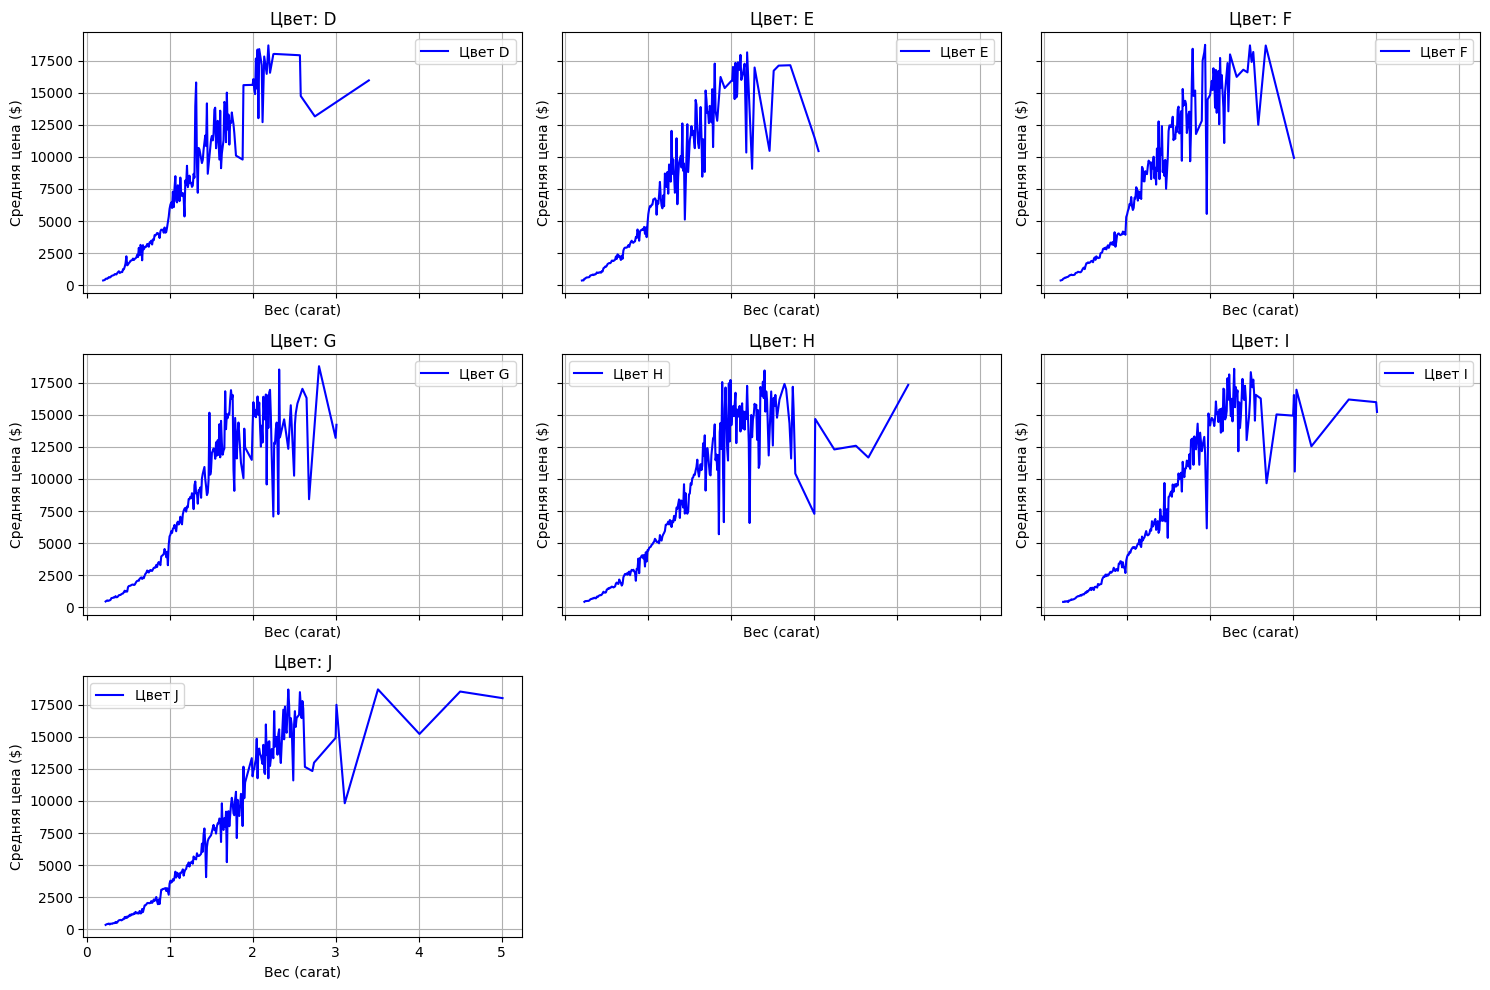

In [231]:
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=True, sharey=True)

# Проходим по каждому цвету и строим графики
for i, color in enumerate(unique_colors):
    row, col = divmod(i, cols)  # Вычисляем позицию в сетке
    subset = df[df["color"] == color].groupby("carat")["price"].mean().reset_index()
    axes[row, col].plot(subset["carat"], subset["price"], color="blue", linestyle="-", label=f"Цвет {color}")

    axes[row, col].set_title(f"Цвет: {color}")
    axes[row, col].set_ylabel("Средняя цена ($)")
    axes[row, col].set_xlabel("Вес (carat)")

    axes[row, col].legend()
    axes[row, col].grid(True)

# Убираем пустые графики, если цветов меньше, чем ячеек
for i in range(len(unique_colors), rows * cols):
    row, col = divmod(i, cols)
    fig.delaxes(axes[row, col])


plt.tight_layout()
plt.show()

 Видно, что для всех цветов с увеличением веса цена растёт, но на больших значениях наблюдаются колебания. Дорогие экземпляры присутствуют во всех категориях, но максимальные цены чаще встречаются у бриллиантов с цветами D, E и F. Более жёлтые оттенки (H, I, J) в целом дешевле, но всё же имеют дорогие экземпляры, что может быть связано с другими характеристиками, такими как качество огранки или прозрачность.

### Зависимость веса (carat) и размеры сторон (x, y, z)

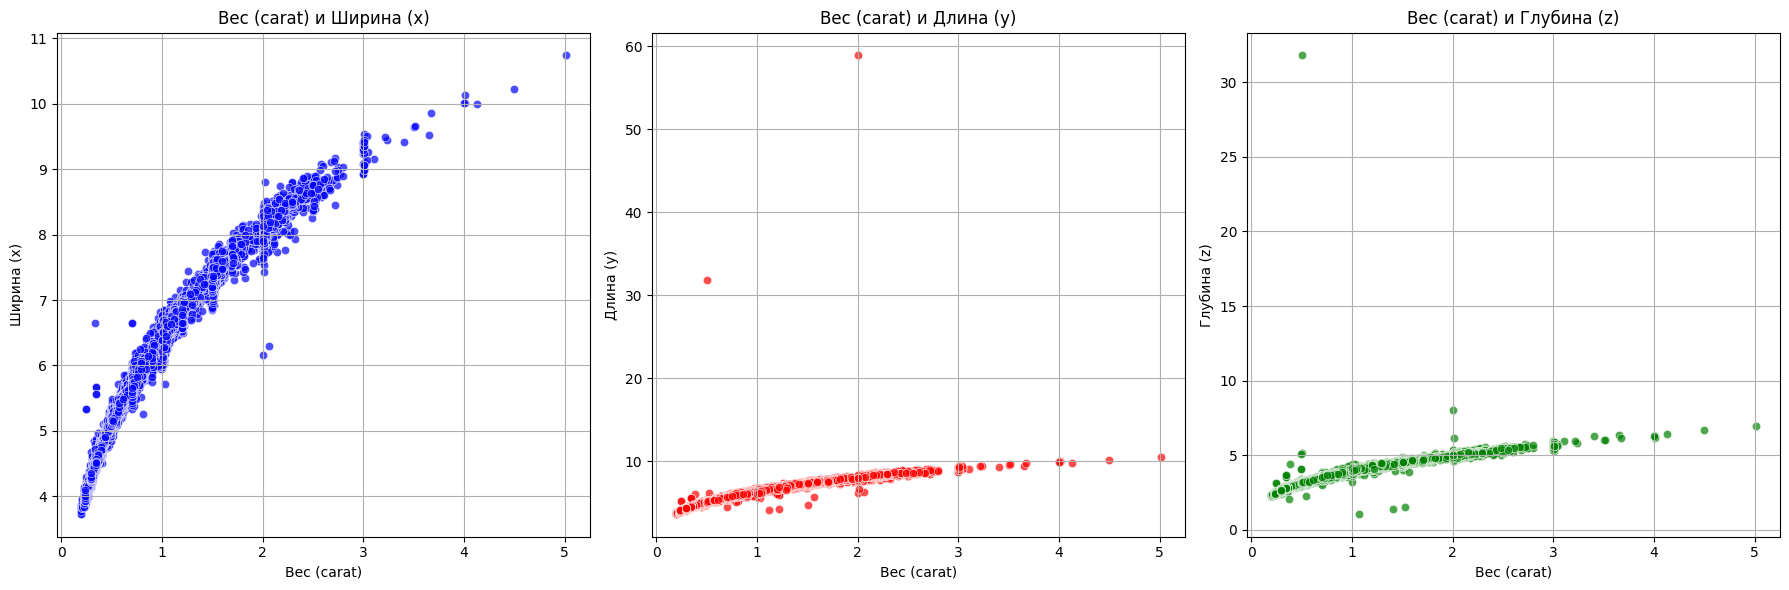

In [232]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# График carat vs x
sns.scatterplot(data=df, x="carat", y="x", color="blue", alpha=0.7, ax=axes[0])
axes[0].set_title("Вес (carat) и Ширина (x)")
axes[0].set_ylabel("Ширина (x)")
axes[0].grid(True)

# График carat vs y
sns.scatterplot(data=df, x="carat", y="y", color="red", alpha=0.7, ax=axes[1])
axes[1].set_title("Вес (carat) и Длина (y)")
axes[1].set_ylabel("Длина (y)")
axes[1].grid(True)

# График carat vs z
sns.scatterplot(data=df, x="carat", y="z", color="green", alpha=0.7, ax=axes[2])
axes[2].set_title("Вес (carat) и Глубина (z)")
axes[2].set_ylabel("Глубина (z)")
axes[2].grid(True)

# Общая подпись оси X
for ax in axes:
    ax.set_xlabel("Вес (carat)")

plt.tight_layout()
plt.show()

1. Вес vs. Ширина (x) (синий график, слева):

Наблюдается чёткая положительная зависимость между весом и шириной бриллиантов.
Чем больше вес, тем шире бриллиант, без резких выбросов.

2. Вес vs. Длина (y) (красный график, в центре):

В целом, зависимость положительная, но есть несколько выбросов, особенно один аномально длинный камень (~60).

3. Вес vs. Глубина (z) (зелёный график, справа):

Глубина тоже растёт с весом, но зависимость менее выражена.
Присутствуют несколько выбросов с аномально большой глубиной.

Видно экспонененциальную зависимость

### Зависимоть цены и размеры сторон (x, y, z)

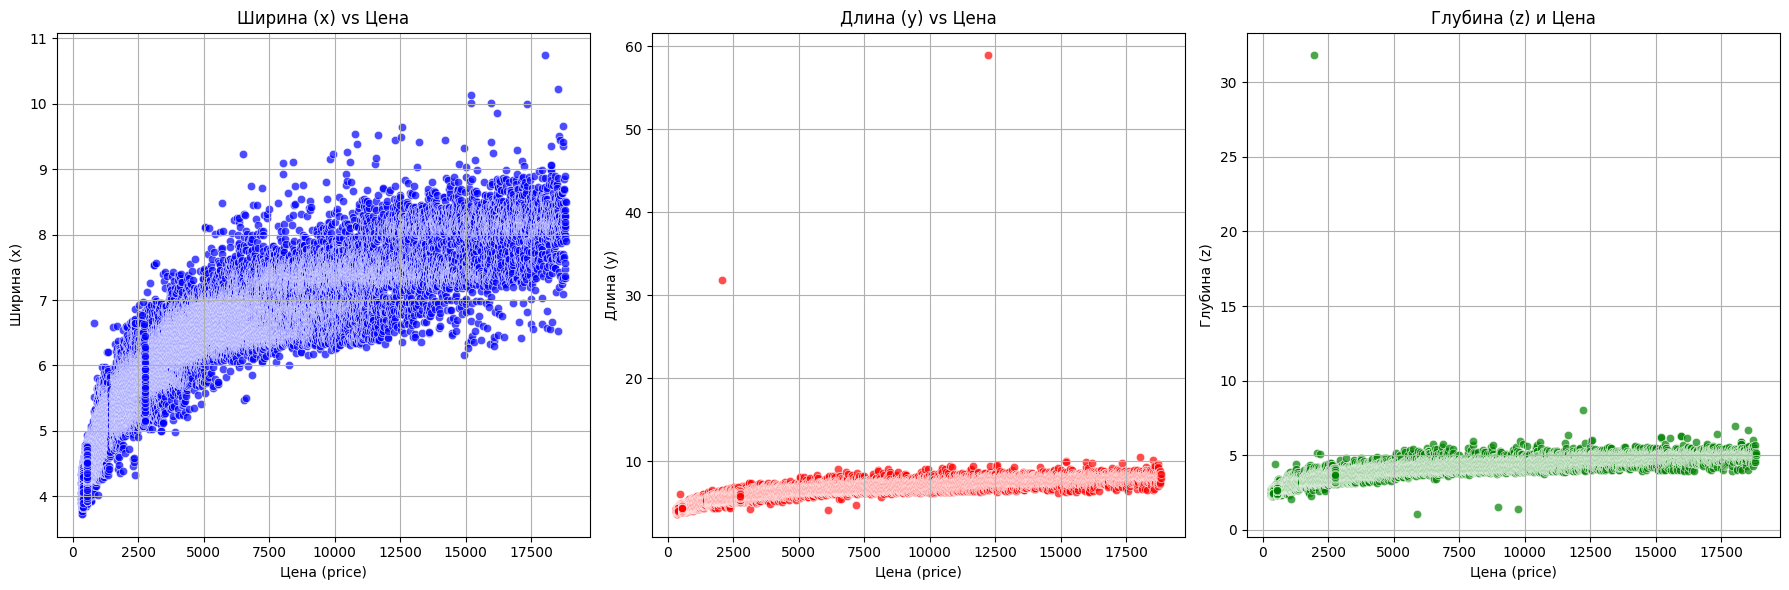

In [233]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# График x vs cut
sns.scatterplot(data=df, x="price", y="x", color="blue", alpha=0.7, ax=axes[0])
axes[0].set_title("Ширина (x) vs Цена")
axes[0].set_ylabel("Ширина (x)")
axes[0].grid(True)

# График y vs cut
sns.scatterplot(data=df, x="price", y="y", color="red", alpha=0.7, ax=axes[1])
axes[1].set_title("Длина (y) vs Цена")
axes[1].set_ylabel("Длина (y)")
axes[1].grid(True)

# График z vs cut
sns.scatterplot(data=df, x="price", y="z", color="green", alpha=0.7, ax=axes[2])
axes[2].set_title("Глубина (z) и Цена")
axes[2].set_ylabel("Глубина (z)")
axes[2].grid(True)

# Поворачиваем подписи оси X для удобства
for ax in axes:
    ax.set_xlabel("Цена (price)")

plt.tight_layout()
plt.show()

1. Ширина (x) vs Цена (синий график, слева). В целом наблюдается положительная зависимость: с ростом цены увеличивается ширина. Однако после определённого порога цена может расти независимо от ширины. Видно значительное скопление точек в средней части, что указывает на популярные размеры.

2. Длина (y) vs Цена (красный график, в центре). Аналогичная тенденция: чем выше цена, тем больше длина. Есть выбросы, особенно один экстремально длинный бриллиант (~60), который явно аномален.

3. Глубина (z) vs Цена (зелёный график, справа). Глубина слабо коррелирует с ценой, распределение более равномерное. Есть несколько выбросов, но основная масса данных сосредоточена в узком диапазоне.

## 7. "Тепловая карта" зависимости признаков.


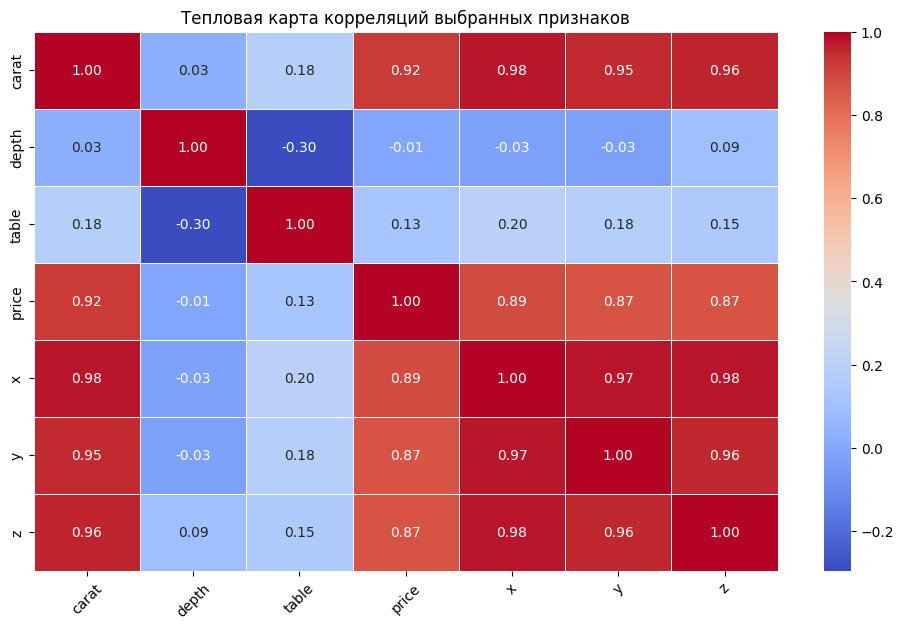

In [234]:
selected_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
df_selected = df[selected_columns]

plt.figure(figsize=(12, 7))
sns.heatmap(df_selected.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45)
plt.title("Тепловая карта корреляций выбранных признаков")
plt.show()




*   "Сarat" (вес бриллианта) сильно коррелирует с "price" и линейными размерами "x", "y", "z", что логично — большие бриллианты дороже.
*   "Depth" и "table" слабо связаны с ценой и размерами, а их отрицательная корреляция говорит о слабом влиянии на цену.



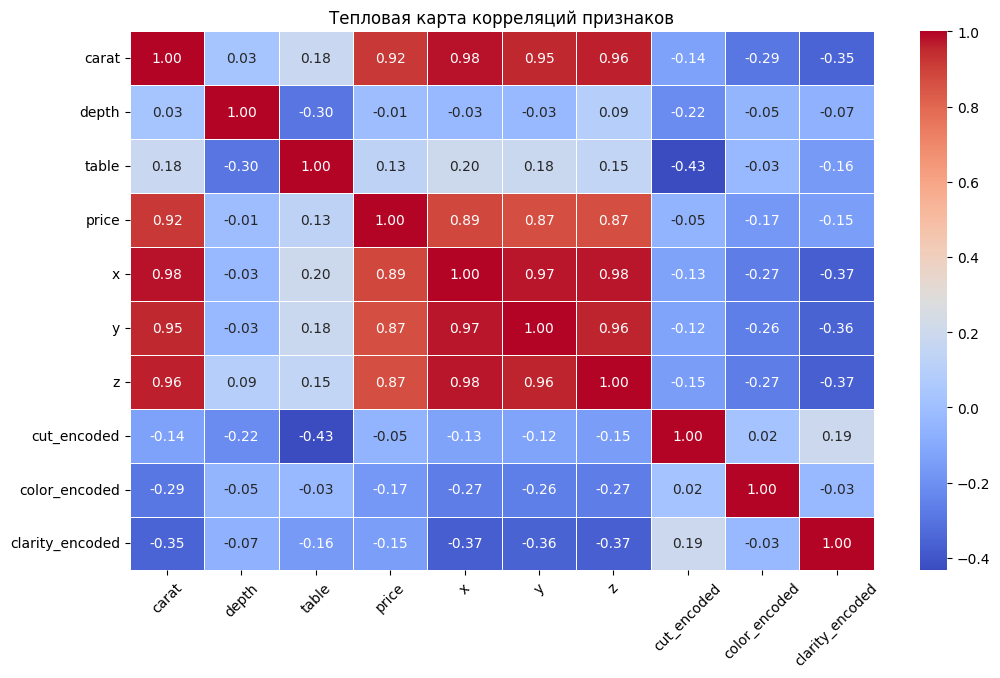

In [235]:
df_colums = df.select_dtypes(include=["number"])

plt.figure(figsize=(12, 7))
sns.heatmap(df_colums.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45)
plt.title("Тепловая карта корреляций признаков")
plt.show()

## 8. Отделение целевого признака (цены) и разбиение данных на обучающую и тестовую выборки

In [236]:
df.drop("cut", axis=1, inplace=True)

In [237]:
df.drop("color", axis=1, inplace=True)

In [238]:
df.drop("clarity", axis=1, inplace=True)

In [239]:
df.head()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,61.5,55.0,326,3.95,3.98,2.43,5,6,2
1,0.21,59.8,61.0,326,3.89,3.84,2.31,4,6,3
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,6,5
3,0.29,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,1,2


### Отделяем целевой признак

In [240]:
X = df.drop(columns=['price'])
y = df['price']

### Разбиваем набор данных на тренировочную и тестовую выборки.

In [241]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% на тест
    shuffle=True,
    random_state=42
)

## Нормализация признаков

In [242]:
X_train.head(3)

,carat,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded
6428,1.02,61.3,62.0,6.46,6.42,3.95,4,7,2
49475,0.52,62.3,57.0,5.12,5.15,3.20,5,6,6
43563,0.41,61.7,56.0,4.80,4.77,2.95,5,4,8


In [243]:
# Нормализация только на тренировочных данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Только transform на тесте

In [244]:
X_train_scaled

array([[ 0.46862508, -0.31490915,  2.03845209, ...,  0.08436767,
         1.5262869 , -1.24833454],
       [-0.5849811 ,  0.38473941, -0.20338951, ...,  0.98048862,
         0.93825225,  1.17948672],
       [-0.81677446, -0.03504972, -0.65175784, ...,  0.98048862,
        -0.23781705,  2.39339735],
       ...,
       [-0.96427932,  0.10487999, -1.54849448, ...,  0.98048862,
        -0.23781705,  2.39339735],
       [ 0.21575959,  0.73456368,  0.69334713, ...,  0.08436767,
        -2.00192101, -0.64137923],
       [ 1.03757241, -0.17497944, -1.10012616, ...,  0.98048862,
        -0.23781705, -1.24833454]])

## 10. Обучение модели линейной регрессии и оценка качества

### Построение модели

In [245]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

### Предсказания

In [246]:
y_pred = model.predict(X_test_scaled)

### Оценка точности

In [247]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {mse ** 0.5:.2f}')

R2: 0.9069
MSE: 1444441.67
RMSE: 1201.85


In [248]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape * 100:.2f}%')

MAPE: 43.64%


R² хороший, значит модель хорошо объясняет основную тенденцию в данных.


Однако, ошибки MSE, RMSE и MAPE большие, потому что диапазон цен широк, и относительная ошибка на дорогих бриллиантах может быть значительной.

## 11. Обучение модели полиномиальной регрессии и сравнение результатов

### Построение модели

In [249]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [250]:
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

LinearRegression()

In [251]:
y_pred_poly = model_poly.predict(X_test_poly)

### Оценка точности

In [252]:
r2 = r2_score(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred_poly) * 100

print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

R2: 0.8494
MSE: 2337834.97
RMSE: 1529.00
MAPE: 19.50%


1. **Понижение R² в полиномиальной модели:**
Полиномиальная модель, несмотря на то что учла нелинейные зависимости, объясняет меньше вариации в данных, чем линейная. Это может быть связано с переобучением (overfitting) на обучающих данных.

2. **Увеличение MSE и RMSE:**
Полиномиальная модель дала большую ошибку в абсолютных величинах, что указывает на то, что модель хуже предсказывает конкретные значения. Это может происходить, если полиномиальная модель слишком "подогнала" данные на обучающей выборке и не обобщается на тестовую.

3. **Улучшение MAPE:**
MAPE для полиномиальной модели заметно снизился (с 43.64% до 19.50%). Это говорит о том, что относительные ошибки (в процентах) стали меньше, возможно, потому что полиномиальная модель лучше справилась с малыми ценами, где линейная модель ошибалась больше.

## 12. Дополнительные регрессионные модели

### Ridge модель

#### Создание модели

In [253]:
ridge_model = Ridge(alpha=2.0)  # alpha - коэффициент регуляризации
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=2.0)

#### Предсказания

In [254]:
y_pred_ridge = ridge_model.predict(X_test_scaled)

#### Оценка точности

In [255]:
r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred_ridge) * 100

print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

R2: 0.9069
MSE: 1444484.18
RMSE: 1201.87
MAPE: 43.66%


Ridge-регрессия показала такие же результаты, как и линейная модель, с  𝑅2= 0. 9069, что свидетельствует о хорошем объяснении общей тенденции данных. Однако ошибки MSE, RMSE и MAPE остаются высокими, что указывает на значительный разброс предсказаний, особенно для дорогих бриллиантов.

### Модель деревьев решений

#### Построение модели

In [256]:
decision_tree_model = DecisionTreeRegressor(random_state=42)

In [257]:
decision_tree_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

#### Предсказания

In [258]:
y_pred_tree = decision_tree_model.predict(X_test_scaled)

#### Оценка точности

In [259]:
r2 = r2_score(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred_tree) * 100

print(f'R2: {r2:.4f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2f}%')

R2: 0.9656
MSE: 533116.51
RMSE: 730.15
MAPE: 8.56%


**R² = 0.965**6 — это указывает на высокое качество объяснения вариации данных, что означает, что модель хорошо справляется с выявлением зависимостей.

**MSE = 533116.51 и RMSE = 730.15** — значения ошибок в абсолютных величинах намного ниже, чем у других моделей, что свидетельствует о более точных предсказаниях.

**MAPE = 8.56**% — это значительно ниже, чем у линейной и полиномиальной моделей, что означает, что относительная ошибка предсказаний теперь минимальна.

Модель дерева решений значительно превосходит другие модели по точности и эффективности